In [581]:
import json
import requests
import pandas as pd
import math
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline

apikey = 'dzhZrd1lm3bwu2bFCsLhBcDKdBgzHVkPgjSOubts'

In [669]:
infection = "asthma"


In [670]:
# GET THE NUID for the INFECTIOn
infection = infection.replace(" ", "%20")
response = requests.get('https://rxnav.nlm.nih.gov/REST/Ndfrt/search.json?conceptName='+infection+'&kindName=DISEASE_KIND')
d = response.json()
if (d['groupConcepts'][0] == None):
    print("ERROR! Infection not found!")
    
else:    
    nui = d['groupConcepts'][0]['concept'][0]['conceptNui']
nui

'N0000000498'

In [671]:
# GET INGREDIENTS THAT CAN FIX THE GIVEN INFECTION
response2 = requests.get('https://rxnav.nlm.nih.gov/REST/Ndfrt/reverse.json?nui='+nui+'&roleName=may_treat%20{NDFRT}&transitive=false')
ingredients = response2.json()
ing_list = ingredients['groupConcepts'][0]['concept']
ing_list

[{'conceptKind': 'DRUG_KIND',
  'conceptName': 'ALBUTEROL',
  'conceptNui': 'N0000147099'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'AMINOPHYLLINE',
  'conceptNui': 'N0000146397'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'ANTIASTHMA/BRONCHODILATORS',
  'conceptNui': 'N0000029238'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'BITOLTEROL',
  'conceptNui': 'N0000147729'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'CORTISONE',
  'conceptNui': 'N0000146287'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'CROMOLYN',
  'conceptNui': 'N0000147788'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'EPHEDRA',
  'conceptNui': 'N0000023010'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'EPHEDRINE',
  'conceptNui': 'N0000147478'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'FLUNISOLIDE',
  'conceptNui': 'N0000146759'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'FORMOTEROL',
  'conceptNui': 'N0000148706'},
 {'conceptKind': 'DRUG_KIND',
  'conceptName': 'GLYCEROL,I

In [672]:
# MAKE THE NAMES AND NUIDS OF ALL THE FIXES
nuis = []
names = []
for x in ing_list:
    names.append(x['conceptName'])
    nuis.append(x['conceptNui'])
print(nuis)
print(names)

['N0000147099', 'N0000146397', 'N0000029238', 'N0000147729', 'N0000146287', 'N0000147788', 'N0000023010', 'N0000147478', 'N0000146759', 'N0000148706', 'N0000146782', 'N0000146821', 'N0000147881', 'N0000192138', 'N0000147906', 'N0000146409', 'N0000022122', 'N0000146829', 'N0000148817', 'N0000146943', 'N0000147983', 'N0000146334', 'N0000146229', 'N0000146887', 'N0000192520', 'N0000021960', 'N0000148026', 'N0000146467', 'N0000146469', 'N0000148048', 'N0000148457', 'N0000148478']
['ALBUTEROL', 'AMINOPHYLLINE', 'ANTIASTHMA/BRONCHODILATORS', 'BITOLTEROL', 'CORTISONE', 'CROMOLYN', 'EPHEDRA', 'EPHEDRINE', 'FLUNISOLIDE', 'FORMOTEROL', 'GLYCEROL,IODINATED', 'HALOTHANE', 'ISOETHARINE', 'MEPOLIZUMAB', 'METAPROTERENOL', 'METHYLPREDNISOLONE', 'MONTELUKAST', 'OLEANDOMYCIN (AS TROLEANDOMYCIN)', 'OMALIZUMAB', 'OXTRIPHYLLINE', 'PIRBUTEROL', 'PREDNISOLONE', 'PREDNISONE', 'PSEUDOEPHEDRINE', 'RESLIZUMAB', 'SALMETEROL', 'TERBUTALINE', 'THEOPHYLLINE', 'THEOPHYLLINE,ANHYDROUS', 'TRIPELENNAMINE', 'ZAFIRLUKAST'

In [673]:
# CONSTRUCT THE OUTPUT DICTIONARY
outdict = {}
for i in range(len(names)):
    outdict[names[i]] = {
        'nui': nuis[i],
        'rxcui': 0,
        'sideeffects': {},
        'brands': []
    }
outdict

{'ALBUTEROL': {'brands': [],
  'nui': 'N0000147099',
  'rxcui': 0,
  'sideeffects': {}},
 'AMINOPHYLLINE': {'brands': [],
  'nui': 'N0000146397',
  'rxcui': 0,
  'sideeffects': {}},
 'ANTIASTHMA/BRONCHODILATORS': {'brands': [],
  'nui': 'N0000029238',
  'rxcui': 0,
  'sideeffects': {}},
 'BITOLTEROL': {'brands': [],
  'nui': 'N0000147729',
  'rxcui': 0,
  'sideeffects': {}},
 'CORTISONE': {'brands': [],
  'nui': 'N0000146287',
  'rxcui': 0,
  'sideeffects': {}},
 'CROMOLYN': {'brands': [],
  'nui': 'N0000147788',
  'rxcui': 0,
  'sideeffects': {}},
 'EPHEDRA': {'brands': [],
  'nui': 'N0000023010',
  'rxcui': 0,
  'sideeffects': {}},
 'EPHEDRINE': {'brands': [],
  'nui': 'N0000147478',
  'rxcui': 0,
  'sideeffects': {}},
 'FLUNISOLIDE': {'brands': [],
  'nui': 'N0000146759',
  'rxcui': 0,
  'sideeffects': {}},
 'FORMOTEROL': {'brands': [],
  'nui': 'N0000148706',
  'rxcui': 0,
  'sideeffects': {}},
 'GLYCEROL,IODINATED': {'brands': [],
  'nui': 'N0000146782',
  'rxcui': 0,
  'sideeffec

In [674]:
# GET ANOTHER ID FOR THE DRUGS, delete the ones that don't have an ID
rxid = []
for s in names:
    f = (requests.get('https://rxnav.nlm.nih.gov/REST/rxcui.json?name='+s))
    f = f.json()
    try:
        rxid.append(f['idGroup']['rxnormId'][0])
        outdict[s]['rxcui'] = f['idGroup']['rxnormId'][0]
    except:
        del outdict[s]
        continue
        
rxid

outdict

{'ALBUTEROL': {'brands': [],
  'nui': 'N0000147099',
  'rxcui': '435',
  'sideeffects': {}},
 'AMINOPHYLLINE': {'brands': [],
  'nui': 'N0000146397',
  'rxcui': '689',
  'sideeffects': {}},
 'BITOLTEROL': {'brands': [],
  'nui': 'N0000147729',
  'rxcui': '19499',
  'sideeffects': {}},
 'CORTISONE': {'brands': [],
  'nui': 'N0000146287',
  'rxcui': '2878',
  'sideeffects': {}},
 'CROMOLYN': {'brands': [],
  'nui': 'N0000147788',
  'rxcui': '42612',
  'sideeffects': {}},
 'EPHEDRINE': {'brands': [],
  'nui': 'N0000147478',
  'rxcui': '3966',
  'sideeffects': {}},
 'FLUNISOLIDE': {'brands': [],
  'nui': 'N0000146759',
  'rxcui': '25120',
  'sideeffects': {}},
 'FORMOTEROL': {'brands': [],
  'nui': 'N0000148706',
  'rxcui': '25255',
  'sideeffects': {}},
 'GLYCEROL,IODINATED': {'brands': [],
  'nui': 'N0000146782',
  'rxcui': '27723',
  'sideeffects': {}},
 'HALOTHANE': {'brands': [],
  'nui': 'N0000146821',
  'rxcui': '5095',
  'sideeffects': {}},
 'ISOETHARINE': {'brands': [],
  'nui': '

In [675]:
#ADD BRANDS FOR EACH OF THE MEDICINES

for key in outdict:
    b = requests.get('https://rxnav.nlm.nih.gov/REST/brands.json?ingredientids='+outdict[key]['rxcui'])
    x = b.json()
    x = x['brandGroup']
    if 'conceptProperties' in x.keys():
        x = x['conceptProperties']
        for y in x:
            outdict[key]['brands'].append(y['name'])
            

outdict

{'ALBUTEROL': {'brands': ['Accuneb',
   'Combivent',
   'DuoNeb',
   'ProAir',
   'Proventil',
   'Ventolin',
   'Vospire'],
  'nui': 'N0000147099',
  'rxcui': '435',
  'sideeffects': {}},
 'AMINOPHYLLINE': {'brands': [],
  'nui': 'N0000146397',
  'rxcui': '689',
  'sideeffects': {}},
 'BITOLTEROL': {'brands': [],
  'nui': 'N0000147729',
  'rxcui': '19499',
  'sideeffects': {}},
 'CORTISONE': {'brands': [],
  'nui': 'N0000146287',
  'rxcui': '2878',
  'sideeffects': {}},
 'CROMOLYN': {'brands': ['Crolom', 'Gastrocrom', 'Nasalcrom'],
  'nui': 'N0000147788',
  'rxcui': '42612',
  'sideeffects': {}},
 'EPHEDRINE': {'brands': ['Akovaz', 'Bronkaid', 'Corphedra', 'Primatene'],
  'nui': 'N0000147478',
  'rxcui': '3966',
  'sideeffects': {}},
 'FLUNISOLIDE': {'brands': ['Aerospan'],
  'nui': 'N0000146759',
  'rxcui': '25120',
  'sideeffects': {}},
 'FORMOTEROL': {'brands': ['Bevespi',
   'Dulera',
   'Foradil',
   'Perforomist',
   'Symbicort'],
  'nui': 'N0000148706',
  'rxcui': '25255',
  's

In [676]:

bad = []

for key in outdict:
    q = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.substance_name:"'+key+'"&count=patient.reaction.reactionmeddrapt.exact')
    if 'error' in q.json():
        bad.append(key)
        continue
    df = pd.DataFrame(q.json()['results'])
    total = df['count'].sum()
    df['percentage'] = (df['count']*100/total)
    
    for i in range(min(10, len(df))):
        outdict[key]['sideeffects'][df.iloc[i]['term']] = np.asscalar(df.iloc[i]['percentage'])

for b in bad:
    del outdict[b]
        
outdict 

{'ALBUTEROL': {'brands': ['Accuneb',
   'Combivent',
   'DuoNeb',
   'ProAir',
   'Proventil',
   'Ventolin',
   'Vospire'],
  'nui': 'N0000147099',
  'rxcui': '435',
  'sideeffects': {'ASTHMA': 2.7229042037445264,
   'COUGH': 2.539558007751707,
   'DEVICE USE ERROR': 2.0961160453504686,
   'DRUG INEFFECTIVE': 4.657419764719928,
   'DYSPNOEA': 6.420527951767159,
   'FATIGUE': 2.2193417445177355,
   'HEADACHE': 2.1489879716367697,
   'NAUSEA': 2.433387768676795,
   'PNEUMONIA': 2.451722388276077,
   'PRODUCT QUALITY ISSUE': 2.151972677152932}},
 'AMINOPHYLLINE': {'brands': [],
  'nui': 'N0000146397',
  'rxcui': '689',
  'sideeffects': {'ASTHMA': 3.177570093457944,
   'COUGH': 1.6822429906542056,
   'DRUG INEFFECTIVE': 2.554517133956386,
   'DYSPNOEA': 4.984423676012461,
   'HYPOTENSION': 1.9937694704049844,
   'NAUSEA': 2.05607476635514,
   'PNEUMONIA': 2.1806853582554515,
   'RESPIRATORY FAILURE': 1.8691588785046729,
   'VOMITING': 2.305295950155763,
   'WHEEZING': 1.7445482866043613}}

In [678]:
bigdf = pd.DataFrame.from_dict(outdict)
bigdf

,ALBUTEROL,AMINOPHYLLINE,CORTISONE,CROMOLYN,EPHEDRINE,FLUNISOLIDE,FORMOTEROL,MEPOLIZUMAB,METAPROTERENOL,METHYLPREDNISOLONE,...,OMALIZUMAB,PREDNISOLONE,PREDNISONE,PSEUDOEPHEDRINE,RESLIZUMAB,SALMETEROL,TERBUTALINE,THEOPHYLLINE,ZAFIRLUKAST,ZILEUTON
brands,"[Accuneb, Combivent, DuoNeb, ProAir, Proventil...",[],[],"[Crolom, Gastrocrom, Nasalcrom]","[Akovaz, Bronkaid, Corphedra, Primatene]",[Aerospan],"[Bevespi, Dulera, Foradil, Perforomist, Symbic...",[Nucala],[],"[A-MethaPred, Depo-Medrol, HybriSil, Medrol, S...",...,[Xolair],"[Blephamide, Econopred, Econopred Plus, Flo-Pr...","[Deltasone, Rayos]","[A-Phedrin, Advil Cold and Sinus, Alavert D, A...",[Cinqair],"[Advair, AirDuo, Serevent]",[],"[Elixophyllin, Quibron-T, Theo-24, Theochron, ...",[Accolate],[Zyflo]
nui,N0000147099,N0000146397,N0000146287,N0000147788,N0000147478,N0000146759,N0000148706,N0000192138,N0000147906,N0000146409,...,N0000148817,N0000146334,N0000146229,N0000146887,N0000192520,N0000021960,N0000148026,N0000146467,N0000148457,N0000148478
rxcui,435,689,2878,42612,3966,25120,25255,1720597,7688,6902,...,302379,8638,8640,8896,1746889,36117,10368,10438,114970,40575
sideeffects,"{'DYSPNOEA': 6.420527951767159, 'DRUG INEFFECT...","{'DYSPNOEA': 4.984423676012461, 'ASTHMA': 3.17...","{'DRUG INEFFECTIVE': 4.632989115266536, 'PAIN'...","{'DRUG INEFFECTIVE': 3.9574719432959244, 'DYSP...","{'DYSPNOEA': 5.012531328320802, 'DRUG INEFFECT...","{'DYSPNOEA': 3.6413290851160673, 'NAUSEA': 3.5...","{'DYSPNOEA': 7.782814648805583, 'DRUG DOSE OMI...","{'DYSPNOEA': 5.128908392759188, 'ASTHMA': 4.71...","{'DEATH': 2.803738317757009, 'WEIGHT INCREASED...","{'PYREXIA': 2.9048798505192717, 'DYSPNOEA': 2....",...,"{'ASTHMA': 6.88490193637867, 'DYSPNOEA': 4.781...","{'PYREXIA': 3.596465163370641, 'PNEUMONIA': 3....","{'DRUG INEFFECTIVE': 3.92091583628075, 'FATIGU...","{'DRUG INEFFECTIVE': 7.143054672160615, 'INSOM...","{'DYSPNOEA': 5.421686746987952, 'FATIGUE': 4.2...","{'DYSPNOEA': 7.442994904911942, 'DRUG INEFFECT...",{'DRUG EXPOSURE DURING PREGNANCY': 5.563689604...,"{'DYSPNOEA': 5.8230974198999155, 'ASTHMA': 3.4...","{'DYSPNOEA': 5.600991325898389, 'ASTHMA': 4.60...","{'ASTHMA': 5.662393162393163, 'DYSPNOEA': 5.23..."


In [679]:
for key in outdict:
    results = requests.get("https://data.medicaid.gov/resource/tau9-gfwr.json?$where=ndc_description like '%25"+key+"%25'")
    x = results.json()
    try:
        costdf = pd.DataFrame(x)
        outdict[key]['max_cost'] = costdf['nadac_per_unit'].max()
        outdict[key]['max_form'] = costdf[costdf['nadac_per_unit'] == costdf['nadac_per_unit'].max()]['ndc_description'].iloc[0]
    except:
        outdict[key]['max_cost'] = np.NaN
        outdict[key]['max_form'] = np.NaN

        #print("No data found, sorry")

outdict

{'ALBUTEROL': {'brands': ['Accuneb',
   'Combivent',
   'DuoNeb',
   'ProAir',
   'Proventil',
   'Ventolin',
   'Vospire'],
  'max_cost': '5.24713',
  'max_form': 'LEVALBUTEROL CONC 1.25 MG/0.5',
  'nui': 'N0000147099',
  'rxcui': '435',
  'sideeffects': {'ASTHMA': 2.7229042037445264,
   'COUGH': 2.539558007751707,
   'DEVICE USE ERROR': 2.0961160453504686,
   'DRUG INEFFECTIVE': 4.657419764719928,
   'DYSPNOEA': 6.420527951767159,
   'FATIGUE': 2.2193417445177355,
   'HEADACHE': 2.1489879716367697,
   'NAUSEA': 2.433387768676795,
   'PNEUMONIA': 2.451722388276077,
   'PRODUCT QUALITY ISSUE': 2.151972677152932}},
 'AMINOPHYLLINE': {'brands': [],
  'max_cost': nan,
  'max_form': nan,
  'nui': 'N0000146397',
  'rxcui': '689',
  'sideeffects': {'ASTHMA': 3.177570093457944,
   'COUGH': 1.6822429906542056,
   'DRUG INEFFECTIVE': 2.554517133956386,
   'DYSPNOEA': 4.984423676012461,
   'HYPOTENSION': 1.9937694704049844,
   'NAUSEA': 2.05607476635514,
   'PNEUMONIA': 2.1806853582554515,
   'R

Text(0.5,0,'Percentage of Incidents %')

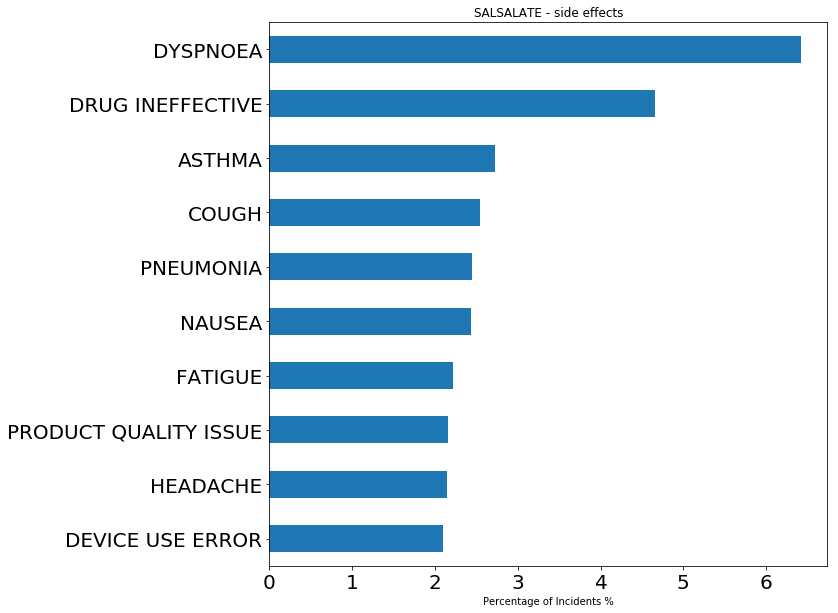

In [684]:
fig, ax = plt.subplots(figsize=(10, 10))
sample = {'ALBUTEROL': {'brands': ['Accuneb',
   'Combivent',
   'DuoNeb',
   'ProAir',
   'Proventil',
   'Ventolin',
   'Vospire'],
  'max_cost': '5.24713',
  'max_form': 'LEVALBUTEROL CONC 1.25 MG/0.5',
  'nui': 'N0000147099',
  'rxcui': '435',
  'sideeffects': {'ASTHMA': 2.7229042037445264,
   'COUGH': 2.539558007751707,
   'DEVICE USE ERROR': 2.0961160453504686,
   'DRUG INEFFECTIVE': 4.657419764719928,
   'DYSPNOEA': 6.420527951767159,
   'FATIGUE': 2.2193417445177355,
   'HEADACHE': 2.1489879716367697,
   'NAUSEA': 2.433387768676795,
   'PNEUMONIA': 2.451722388276077,
   'PRODUCT QUALITY ISSUE': 2.151972677152932}}}

sample = sample["ALBUTEROL"]
s = pd.Series(sample['sideeffects'])
s = s.sort_values(ascending=True)

s.plot(kind='barh', fontsize=20)
plt.title("SALSALATE - side effects")
ax.set_xlabel("Percentage of Incidents %")


Text(0.5,0,'Price ($)')

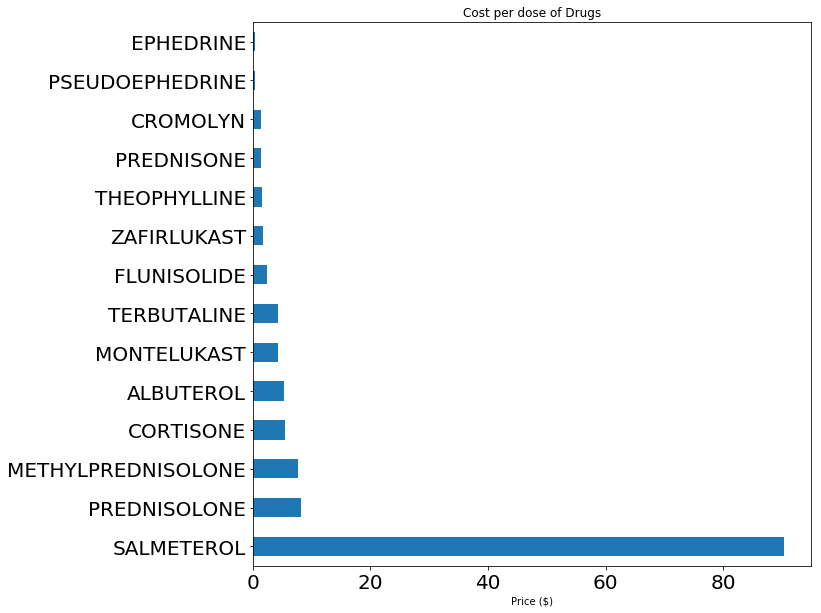

In [681]:
fig, ax = plt.subplots(figsize=(10, 10))

dddd = pd.DataFrame(outdict).T
dddd['max_cost'] = dddd['max_cost'].astype(float)
dddd['max_cost'].dropna().sort_values(ascending=False).plot(kind='barh', fontsize=20)

plt.title("Cost per dose of Drugs")
ax.set_xlabel("Price ($)")




In [677]:
json.dumps(outdict)

'{"ALBUTEROL": {"nui": "N0000147099", "rxcui": "435", "sideeffects": {"DYSPNOEA": 6.420527951767159, "DRUG INEFFECTIVE": 4.657419764719928, "ASTHMA": 2.7229042037445264, "COUGH": 2.539558007751707, "PNEUMONIA": 2.451722388276077, "NAUSEA": 2.433387768676795, "FATIGUE": 2.2193417445177355, "PRODUCT QUALITY ISSUE": 2.151972677152932, "HEADACHE": 2.1489879716367697, "DEVICE USE ERROR": 2.0961160453504686}, "brands": ["Accuneb", "Combivent", "DuoNeb", "ProAir", "Proventil", "Ventolin", "Vospire"]}, "AMINOPHYLLINE": {"nui": "N0000146397", "rxcui": "689", "sideeffects": {"DYSPNOEA": 4.984423676012461, "ASTHMA": 3.177570093457944, "DRUG INEFFECTIVE": 2.554517133956386, "VOMITING": 2.305295950155763, "PNEUMONIA": 2.1806853582554515, "NAUSEA": 2.05607476635514, "HYPOTENSION": 1.9937694704049844, "RESPIRATORY FAILURE": 1.8691588785046729, "WHEEZING": 1.7445482866043613, "COUGH": 1.6822429906542056}, "brands": []}, "CORTISONE": {"nui": "N0000146287", "rxcui": "2878", "sideeffects": {"DRUG INEFFEC